<a href="https://colab.research.google.com/github/srq0617/hanul/blob/master/SRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/srq0617/hanul.git

Cloning into 'hanul'...
remote: Enumerating objects: 12034, done.
^C


In [0]:
import os
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
session = tf.Session(config=config)
from keras import optimizers
import glob
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, BatchNormalization
np.random.seed(111)

Using TensorFlow backend.


In [0]:
low_train_path = r'./hanul'
clean_train_path=r'./hanul/Clean images'
train_path = os.path.join(low_train_path,'low')
train_clean_path = os.path.join(clean_train_path,'Clean images')



train = sorted(glob.glob(os.path.join(train_path,'*.png')))
train_cleaned = sorted(glob.glob(os.path.join(train_clean_path,'*.png')))



test_path=r'./hanul'
test_input_path = os.path.join(test_path,'low')

test = sorted(glob.glob(os.path.join(test_input_path,'sample (740).png')))



print("Total number of images in the training set: ", len(train)) # Training set -장
print("Total number of cleaned images found: ", len(train_cleaned))       # Train cleaned set -장
print("Total number of samples in the test set: ", len(test))     # Test set -장


Total number of images in the training set:  3000
Total number of cleaned images found:  3000
Total number of samples in the test set:  1


In [0]:
X = [] # 인풋에 들어가는 image 리스트 : Train data
X_target = [] # 아웃풋에 들어가는 image 리스트 : Train_cleaned data

for img in train:
    img = load_img(img, grayscale=True,target_size=(512,512))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_cleaned:
    img = load_img(img, grayscale=True,target_size=(512,512))
    img = img_to_array(img).astype('float32')/255.
    X_target.append(img)

X = np.array(X) # image 데이터, 리스트를 numpy array로 형변환, 이렇게 하면 shape 함수 등을 쓸 수 있음
X_target = np.array(X_target) # image 데이터, 리스트를 numpy array로 형변환

print("Size of X : ", X.shape) # Size of X : (144,420,540,1) , Training set 144장
print("Size of X_target : ", X_target.shape) # Size of Y : (144,420,540,1) , Train cleaned 144장

#####################################################
# 테스트이미지 불러오기

test_list=[]
for img in test:
    img = load_img(img, grayscale=True,target_size=(512,512))
    img = img_to_array(img).astype('float32')/255.
    test_list.append(img)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (3000, 512, 512, 1)
Size of X_target :  (3000, 512, 512, 1)


In [0]:
def build_RPILSR():
    input_img = Input(shape=(512, 512, 1), name='image_input')

    #### 아키톆쳐
    x = Conv2D(64, (37, 37), strides=(1,1), activation='relu',kernel_initializer='he_normal', padding='same')(input_img)
    x = Conv2D(32, (13, 13), strides=(1,1), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = Conv2D(1, (25, 25), strides=(1,1), activation='relu',kernel_initializer='he_normal', padding='same')(x)

    # model
    RPILSR = Model(inputs=input_img, outputs=x)

    return RPILSR

In [0]:
model = build_RPILSR()
model.compile(optimizer=optimizers.Adam(), loss='MSE')

In [0]:
hist = model.fit(X, X_target, epochs=1, batch_size=32)

Epoch 1/50
3000/3000 [==============================] - 137s 46ms/step - loss: 7.1469e-04
Epoch 2/50
3000/3000 [==============================] - 138s 46ms/step - loss: 5.6095e-04
Epoch 3/50
3000/3000 [==============================] - 138s 46ms/step - loss: 5.2064e-04
Epoch 4/50
3000/3000 [==============================] - 138s 46ms/step - loss: 5.0651e-04
Epoch 5/50
3000/3000 [==============================] - 138s 46ms/step - loss: 4.8172e-04
Epoch 6/50
3000/3000 [==============================] - 138s 46ms/step - loss: 4.7053e-04
Epoch 7/50
3000/3000 [==============================] - 138s 46ms/step - loss: 4.6572e-04
Epoch 8/50
3000/3000 [==============================] - 138s 46ms/step - loss: 4.6249e-04
Epoch 9/50
3000/3000 [==============================] - 137s 46ms/step - loss: 4.5353e-04
Epoch 10/50
3000/3000 [==============================] - 137s 46ms/step - loss: 4.4765e-04
Epoch 11/50
3000/3000 [==============================] - 137s 46ms/step - loss: 4.4740e-04
Epoch 12

In [0]:
predicted_list = []
for img in test_list:
    img = np.reshape(img, (1, 512, 512, 1))
    
    
    predicted = np.squeeze(model.predict(img, batch_size=1)) # 각 모델의 prediction을 predictions 리스트에 저장
    predicted_list.append(predicted)

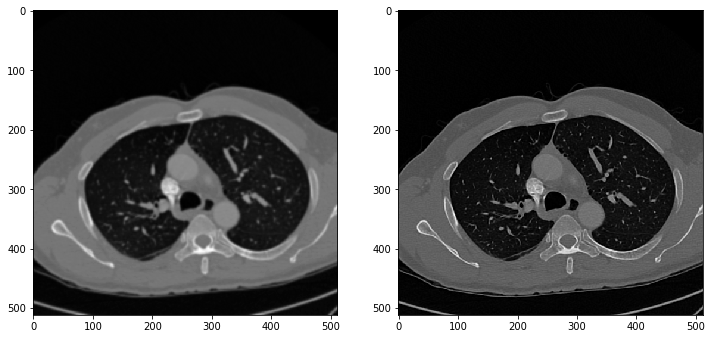

In [0]:
_, ax = plt.subplots(1,2, figsize=(12,9.338))
ax[0].imshow(np.squeeze(test_list[0]), cmap='gray') # 1열에 원본 이미지
ax[1].imshow(np.squeeze(predicted_list[0].astype('float32')), cmap='gray') # 2열에 LR to SR 이미지
plt.show()